<a href="https://colab.research.google.com/github/Sushmitha-712/bmi-app/blob/main/Untitled4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()


Saving winequality-red.csv to winequality-red.csv


In [4]:
# If you need to install anything (usually not required), uncomment:
# !pip install -U scikit-learn joblib seaborn

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Make plots show inline
%matplotlib inline

# Set a seed for reproducibility
RANDOM_STATE = 42


In [5]:
from google.colab import files
uploaded = files.upload()

# Fix: assign filename
filename = list(uploaded.keys())[0]
print("Using file:", filename)

# Use your robust reader
df = robust_read_csv(filename)
print("Shape:", df.shape)
print("Columns:", df.columns.tolist())
df.head()




Saving winequality-red.csv to winequality-red (1).csv
Using file: winequality-red (1).csv
Shape: (1599, 12)
Columns: ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [6]:
# run once at the top
import os, csv, numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns, joblib
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

%matplotlib inline
RANDOM_STATE = 42
plt.rcParams.update({'figure.max_open_warning': 0})


In [7]:
from google.colab import files
# If you already ran files.upload() previously, re-run this only if you need to upload again.
uploaded = files.upload()   # choose winequality-red.csv

# get filename from uploaded dict
filename = list(uploaded.keys())[0]
print("Using file:", filename)


Saving winequality-red.csv to winequality-red (2).csv
Using file: winequality-red (2).csv


In [8]:
def robust_read_csv(path):
    # read sample and pick most likely delimiter
    with open(path, 'r', encoding='utf-8', errors='ignore') as f:
        sample = f.read(8192)
    counts = {',': sample.count(','), ';': sample.count(';'), '\t': sample.count('\t')}
    sep = max(counts, key=counts.get)
    try:
        df = pd.read_csv(path, sep=sep)
        if df.shape[1] == 1:
            dialect = csv.Sniffer().sniff(sample)
            df = pd.read_csv(path, sep=dialect.delimiter)
    except Exception:
        df = pd.read_csv(path)
    # normalize column names to safe pythonic names
    df.columns = (
        df.columns
          .str.strip()
          .str.lower()
          .str.replace(' ', '_')
          .str.replace('(', '')
          .str.replace(')', '')
    )
    return df

df = robust_read_csv(filename)
print("Shape:", df.shape)
print("Columns:", df.columns.tolist())
df.head()


Shape: (1599, 12)
Columns: ['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar', 'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density', 'ph', 'sulphates', 'alcohol', 'quality']


,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         1599 non-null   float64
 1   volatile_acidity      1599 non-null   float64
 2   citric_acid           1599 non-null   float64
 3   residual_sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free_sulfur_dioxide   1599 non-null   float64
 6   total_sulfur_dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   ph                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
None


,count,mean,std,min,25%,50%,75%,max
fixed_acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile_acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric_acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual_sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free_sulfur_dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total_sulfur_dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
ph,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


Missing values per column:
 fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
ph                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64
Duplicate rows: 240


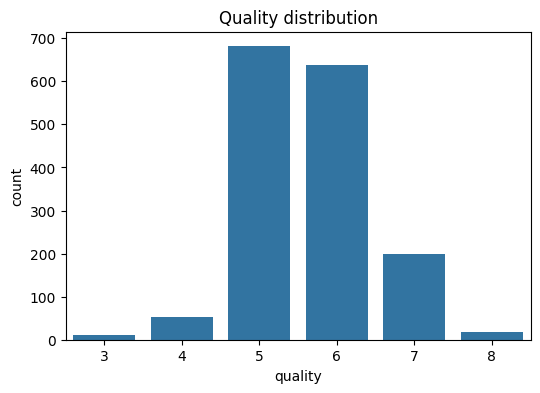

In [9]:
print(df.info())
display(df.describe().T)
print("Missing values per column:\n", df.isnull().sum())
print("Duplicate rows:", df.duplicated().sum())

# target distribution
plt.figure(figsize=(6,4))
sns.countplot(x='quality', data=df)
plt.title('Quality distribution')
plt.show()


In [10]:
data = df.copy()
data = data.drop_duplicates().reset_index(drop=True)
if data.isnull().sum().sum() > 0:
    data = data.fillna(data.median())
# ensure numeric columns are numeric
for c in data.columns:
    data[c] = pd.to_numeric(data[c], errors='ignore')

print("After cleaning:", data.shape)


After cleaning: (1359, 12)


/tmp/ipython-input-2915747781.py:7: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  data[c] = pd.to_numeric(data[c], errors='ignore')


In [11]:
def iqr_outlier_counts(df, cols=None, factor=1.5):
    if cols is None:
        cols = df.select_dtypes(include=[np.number]).columns.tolist()
        cols = [c for c in cols if c != 'quality']
    total = 0
    for c in cols:
        q1, q3 = df[c].quantile(0.25), df[c].quantile(0.75)
        iqr = q3 - q1
        lower, upper = q1 - factor*iqr, q3 + factor*iqr
        cnt = df[(df[c] < lower) | (df[c] > upper)].shape[0]
        print(f"{c}: {cnt} possible outliers")
        total += cnt
    print("Sum of flagged counts (rows may overlap):", total)

iqr_outlier_counts(data)
# If you want to remove them: uncomment below (inspect first!)
# data = remove_iqr_outliers(data, factor=1.5)


fixed_acidity: 41 possible outliers
volatile_acidity: 19 possible outliers
citric_acid: 1 possible outliers
residual_sugar: 126 possible outliers
chlorides: 87 possible outliers
free_sulfur_dioxide: 26 possible outliers
total_sulfur_dioxide: 45 possible outliers
density: 35 possible outliers
ph: 28 possible outliers
sulphates: 55 possible outliers
alcohol: 12 possible outliers
Sum of flagged counts (rows may overlap): 475


In [12]:
data_fe = data.copy()
# create total_sulfur, sulfur_ratio, acid_balance, density_alcohol
data_fe['total_sulfur'] = data_fe['free_sulfur_dioxide'] + data_fe['total_sulfur_dioxide']
data_fe['sulfur_ratio'] = data_fe['free_sulfur_dioxide'] / (data_fe['total_sulfur_dioxide'].replace(0, np.nan))
data_fe['sulfur_ratio'] = data_fe['sulfur_ratio'].fillna(0.0)
eps = 1e-6
data_fe['acid_balance'] = data_fe['citric_acid'] / (data_fe['volatile_acidity'] + eps)
data_fe['density_alcohol'] = data_fe['density'] * data_fe['alcohol']

print("New shape:", data_fe.shape)
data_fe.head()


New shape: (1359, 16)


,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,quality,total_sulfur,sulfur_ratio,acid_balance,density_alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,45.0,0.323529,0.000000,9.37932
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,92.0,0.373134,0.000000,9.76864
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,69.0,0.277778,0.052632,9.77060
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,77.0,0.283333,1.999993,9.78040
4,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,53.0,0.325000,0.000000,9.37932


,quality
quality,1.000000
density_alcohol,0.481352
alcohol,0.480343
acid_balance,0.314186
sulphates,0.248835
citric_acid,0.228057
sulfur_ratio,0.192296
fixed_acidity,0.119024
residual_sugar,0.013640
free_sulfur_dioxide,-0.050463


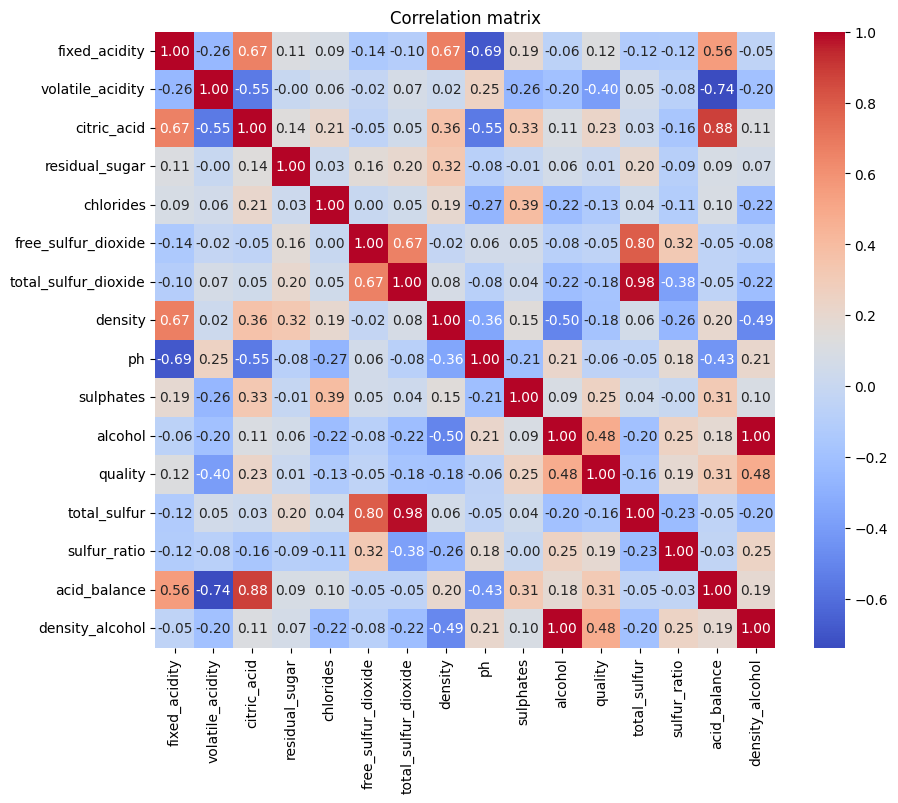

In [13]:
corr = data_fe.corr()
corr_with_target = corr['quality'].sort_values(ascending=False)
display(corr_with_target.head(12))

plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation matrix')
plt.show()


In [14]:
X = data_fe.drop(columns=['quality'])
y = data_fe['quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=RANDOM_STATE)
print("Train:", X_train.shape, "Test:", X_test.shape)


Train: (1087, 15) Test: (272, 15)


In [15]:
pipeline = Pipeline([('scaler', StandardScaler()), ('lr', LinearRegression())])
pipeline.fit(X_train, y_train)
print("Model trained.")


Model trained.


In [16]:
# test set predictions and metrics
y_pred = pipeline.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Test metrics:")
print(f" MSE  = {mse:.4f}")
print(f" RMSE = {rmse:.4f}")
print(f" MAE  = {mae:.4f}")
print(f" R^2  = {r2:.4f}")

# 5-fold CV RMSE on full dataset
cv_scores = cross_val_score(pipeline, X, y, cv=5, scoring='neg_mean_squared_error')
cv_rmse = np.sqrt(-cv_scores)
print("5-fold CV RMSEs:", np.round(cv_rmse, 4))
print("CV mean RMSE:", np.round(cv_rmse.mean(), 4))


Test metrics:
 MSE  = 0.4284
 RMSE = 0.6546
 MAE  = 0.5017
 R^2  = 0.3952
5-fold CV RMSEs: [0.6706 0.6751 0.7031 0.6293 0.6981]
CV mean RMSE: 0.6753


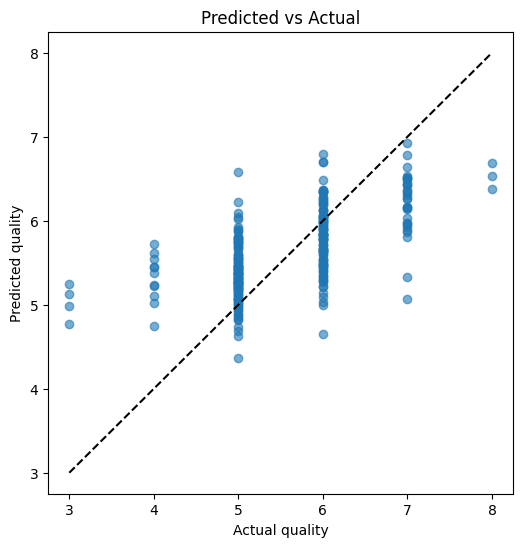

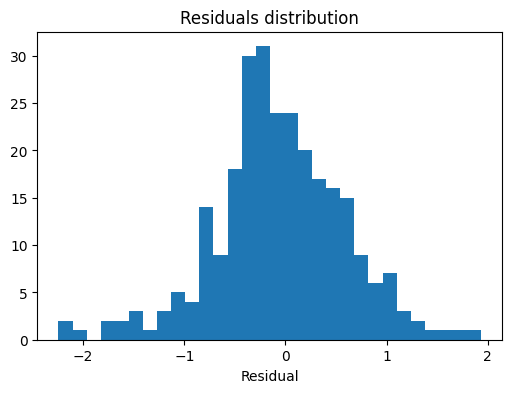

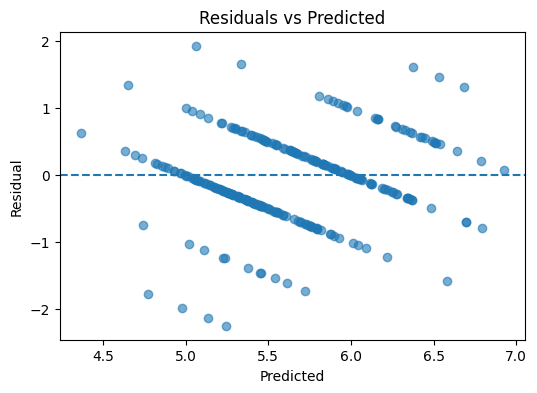

,feature,coef
0,density_alcohol,0.774560
1,alcohol,-0.449218
2,volatile_acidity,-0.184708
3,sulphates,0.148034
4,ph,-0.119756
5,chlorides,-0.114815
6,fixed_acidity,-0.051022
7,sulfur_ratio,0.048626
8,total_sulfur_dioxide,-0.045082
9,density,0.034533


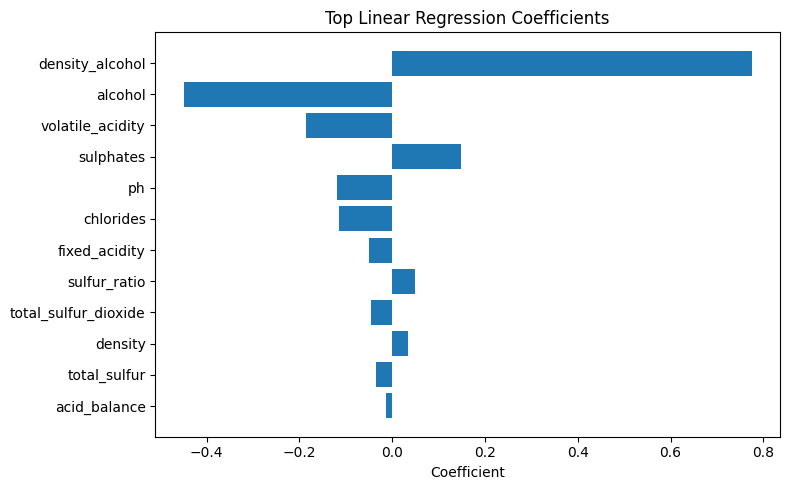

In [17]:
# Predicted vs Actual
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.6)
minv, maxv = min(y_test.min(), y_pred.min()), max(y_test.max(), y_pred.max())
plt.plot([minv, maxv], [minv, maxv], '--', color='k')
plt.xlabel('Actual quality'); plt.ylabel('Predicted quality'); plt.title('Predicted vs Actual')
plt.show()

# Residuals histogram
residuals = y_test - y_pred
plt.figure(figsize=(6,4))
plt.hist(residuals, bins=30)
plt.title('Residuals distribution'); plt.xlabel('Residual'); plt.show()

# Residuals vs Predicted
plt.figure(figsize=(6,4))
plt.scatter(y_pred, residuals, alpha=0.6)
plt.axhline(0, linestyle='--'); plt.xlabel('Predicted'); plt.ylabel('Residual'); plt.title('Residuals vs Predicted')
plt.show()

# Coefficients
coefs = pipeline.named_steps['lr'].coef_
coef_df = pd.DataFrame({'feature': X.columns, 'coef': coefs})
coef_df['abs_coef'] = coef_df['coef'].abs()
coef_df = coef_df.sort_values('abs_coef', ascending=False).reset_index(drop=True)
display(coef_df[['feature','coef']].head(12))

# Bar plot top coefficients
topn = min(12, coef_df.shape[0])
plt.figure(figsize=(8,5))
plt.barh(coef_df['feature'].head(topn)[::-1], coef_df['coef'].head(topn)[::-1])
plt.title('Top Linear Regression Coefficients'); plt.xlabel('Coefficient'); plt.tight_layout(); plt.show()


In [18]:
joblib.dump(pipeline, 'wine_quality_lr_pipeline.pkl')
data_fe.to_csv('wine_red_clean_engineered.csv', index=False)
print("Saved: wine_quality_lr_pipeline.pkl and wine_red_clean_engineered.csv")

from google.colab import files
files.download('wine_quality_lr_pipeline.pkl')
files.download('wine_red_clean_engineered.csv')


Saved: wine_quality_lr_pipeline.pkl and wine_red_clean_engineered.csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>